1. Import necessary packages

For this exercise we need

pandas

train_test_split

LogisticRegression

pyplot from matplotlib

KNeighborsClassifier

LogisticRegressionClassifier

RandomForestClassifier

DummyClassifier


In [23]:
%reload_ext nb_black
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    fbeta_score,
    classification_report,
)
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

2. Load and prepare the dataset

Load the training data into a dataframe named df_train_data 

Create binary classification problem - rename some class labels

Create a dataframe of 9 features named X, drop column 9.

Create a data frame of labels named y, select only column 9.

Split the data into a training set and a test set.

In [44]:
df_train_data = pd.read_csv(
    "http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/shuttle/shuttle.tst",
    header=None,
    sep=" ",
)
df_train_data.loc[df_train_data[9] != 4, 9] = 0
df_train_data.loc[df_train_data[9] == 4, 9] = 1

X = df_train_data.drop(columns=[9])
y = df_train_data[9]

X_train, X_test, y_train, y_test = train_test_split(X, y)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

3. Create the model

Instantiate a Logistic Regression classifier with a lbfgs solver.

Fit the classifier to the data.

In [45]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

4. Calculate Accuracy

Calculate and print the accuracy of the model on the test data.

In [46]:
model.score(X_train, y_train)

0.8242758620689655

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

5. Dummy Classifier

Use the dummy classifier to calculate the accuracy of a purely random chance.

Compare this result to the result of the logistic regression classifier above. What does this result tell you?

In [47]:
dum = DummyClassifier(strategy="uniform")
dum.fit(X_train, y_train)
dum.score(X_test, y_test)

0.5117241379310344

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

6. Confusion Matrix

Print the confusion matrix.

In [64]:
predictions = model.predict(X_test)

confusion = confusion_matrix(y_test, predictions, labels=[1, 0])
print(confusion)

[[  43  493]
 [ 140 2949]]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

7. Plot a nicer confusion matrix (optional)

Use the plot_confusion_matrix function from above to plot a nicer looking confusion matrix.

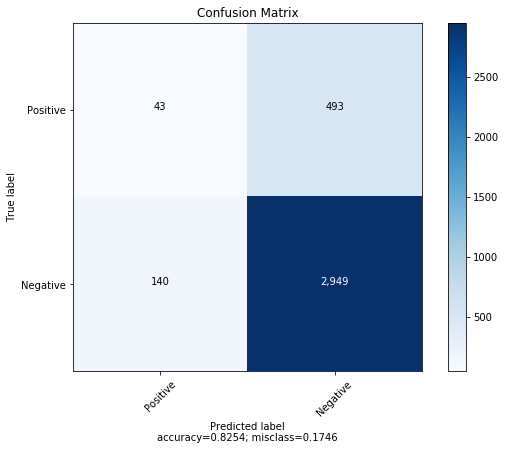

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [66]:
def plot_confusion_matrix(
    cm, target_names, title="Confusion matrix", cmap=None, normalize=True
):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap("Blues")

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(
                j,
                i,
                "{:0.4f}".format(cm[i, j]),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black",
            )
        else:
            plt.text(
                j,
                i,
                "{:,}".format(cm[i, j]),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black",
            )

    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel(
        "Predicted label\naccuracy={:0.4f}; misclass={:0.4f}".format(accuracy, misclass)
    )
    plt.show()


plot_confusion_matrix(
    cm=confusion,
    target_names=["Positive", "Negative"],
    title="Confusion Matrix",
    normalize=False,
)

8. Calculate Metrics

Print the F1, F beta, precision, recall and accuracy scores.

In [68]:
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
fbeta_precision = fbeta_score(y_test, predictions, 0.5)
fbeta_recall = fbeta_score(y_test, predictions, 2)

print("Precision score: {:.2f}".format(precision))
print("Recall score: {:.2f}".format(recall))
print("F1 score: {:.2f}".format(f1))
print("Fbeta score favoring precision: {:.2f}".format(fbeta_precision))
print("FBeta score favoring recall: {:.2f}".format(fbeta_recall))

Precision score: 0.23
Recall score: 0.08
F1 score: 0.12
Fbeta score favoring precision: 0.17
FBeta score favoring recall: 0.09


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

9. Print a classification report

In [72]:
report = classification_report(
    y_test, predictions, target_names=["Negative", "Positive"]
)
report

'              precision    recall  f1-score   support\n\n    Negative       0.86      0.95      0.90      3089\n    Positive       0.23      0.08      0.12       536\n\n    accuracy                           0.83      3625\n   macro avg       0.55      0.52      0.51      3625\nweighted avg       0.76      0.83      0.79      3625\n'

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

10. Plot ROC Curve and AUC

Caculate AUC and plot the curve.

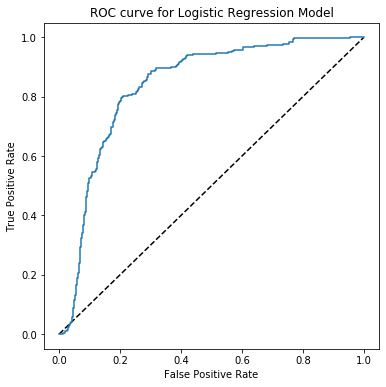

0.8384046906935055


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [74]:
probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
fig = plt.figure(figsize=(6, 6))
plt.plot([0, 1], [0, 1], "k--")
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve for Logistic Regression Model")
plt.show()

auc = roc_auc_score(y_test, probs)
print(auc)

11. Plot Precision-Recall Curve

Plot the precision-recall curve for the model above.

Find the best value for C in the Logistic Regression Classifier for avoiding overfitting. Plot the training and testing accuracy over a range of C values from 0.05 to 1.5.

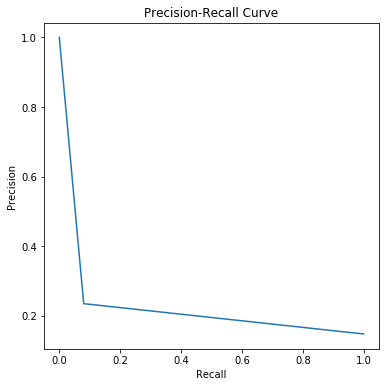

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [75]:
pres, rec, thresholds = precision_recall_curve(y_test, predictions)
fig = plt.figure(figsize=(6, 6))
plt.plot(rec, pres)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

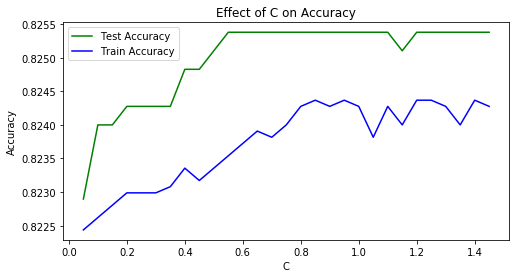

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [79]:
c_vals = np.arange(0.05, 1.5, 0.05)
test_acc = []
train_acc = []

for c in c_vals:
    model = LogisticRegression(solver="lbfgs", C=c, max_iter=1000)
    model.fit(X_train, y_train)
    test_acc.append(model.score(X_test, y_test))
    train_acc.append(model.score(X_train, y_train))

fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(c_vals, test_acc, "-g", label="Test Accuracy")
ax1.plot(c_vals, train_acc, "-b", label="Train Accuracy")
ax1.set(xlabel="C", ylabel="Accuracy")
ax1.set_title("Effect of C on Accuracy")
ax1.legend()
plt.show()

12. Cross Validation

Perform 5-fold cross validation for a Logistic Regression Classifier. Print the 5 accuracy scores and the mean validation score.

In [80]:
clf = LogisticRegression(solver="lbfgs", max_iter=1000)
cv_scores = cross_val_score(clf, X_train, y_train, cv=5)

print("Accuracy scores for the 5 folds: ", cv_scores)
print("Mean cross validatiion score: {:.3f}".format(np.mean(cv_scores)))

Accuracy scores for the 5 folds:  [0.82068966 0.82666667 0.82666667 0.81563218 0.82758621]
Mean cross validatiion score: 0.823


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

13. Is this really linear?

Our linear classifier is not giving us accuracy better than the dummy classifier. Suppose that the data was not linearly separable? Instantiate and train a KNN model with k = 7. How does the accuracy of the KNN model compare to the Logistic Regression from above? What does that tell you about the data?

In [82]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
knn_7_score = knn.score(X_test, y_test)

print(knn_7_score)

0.9975172413793103


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

14. Random Forest

Next, instantiate and fit a RandomForestClassifier and calculate the accuracy of that model.

In [83]:
rf = RandomForestClassifier(n_estimators=50, random_state=50)
rf.fit(X_train, y_train)
rf_score = rf.score(X_test, y_test)
print(rf_score)

1.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>